<html>
    <body>
        <h1 class="alert alert-info" style="text-align: center;">Wild Blueberry Yield: A Machine Learning Approach to help farmers Predicting Yiled of Wild Blue Berries</h1>
        <h2 id="contents">Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1_1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section1_2"><li type="i">Bivariate analysis</li></a>
            </ol>        
            <a href="#section5"><li>Data Prepocessing</li></a>
            <a href="#section6"><li>Model Building and Evaluation</li></a>
            <ol>
                <a href="#sub_section2_1"><li type="i">Ridge Regrassion</li></a>
            </ol> 
        </ol>
    </body>
</html>

<div class="col-md-8">
    <h2 id="section1">1. Importing libraries and loading the dataset</h2>
    <p>Let's start by importing the necessary libraries and loading the dataset.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import os
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')

In [3]:
# Read the data
df_train = pd.read_csv('../input/playground-series-s3e14/train.csv')
df_test = pd.read_csv('../input/playground-series-s3e14/test.csv')
df_sample = pd.read_csv('../input/playground-series-s3e14/sample_submission.csv')

<div class="col-md-8">
    <h2 id="section2">2. Exploring the dataset</h2>
    <p>Let's explore the datasets:</p>
</div>
<div class="col-md-4">
    <a href="#contens">Back to top</h2>
</div>

In [5]:
# Sample train data
df_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
# Sample train data
df_test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


<p>Let's explore the dataset to get a better understanding of its structure and content:</p>

In [36]:
# Funtion to create a brief summary of the data
def summary(df):
    print("Shape of the data: ", df.shape)
    df_summ = pd.DataFrame(df.dtypes, columns=['DataType'])
    df_summ['#Missing'] = df.isnull().sum().values
    df_summ['%Missing'] = (df.isnull().sum().values / len(df)) * 100
    df_summ['#Unique'] = df.nunique().values
    # get description of variable in a dataframe
    df_desc = pd.DataFrame(df.describe(include="all").transpose())
    df_summ['Min'] = df_desc['min'].values
    df_summ['Max'] = df_desc['max'].values
    df_summ['Std'] = df_desc['std'].values
    df_summ['Mean'] = df_desc['mean'].values
    df_summ['25%'] = df_desc['25%'].values
    df_summ['50%'] = df_desc['50%'].values
    df_summ['75%'] = df_desc['75%'].values
    df_summ['FirstValue'] = df.loc[0].values
    df_summ['LastValue'] = df.loc[len(df)-1].values

    return df_summ

In [37]:
# Train data summary
summary(df_train).style.background_gradient(cmap='crest', axis=0)

Shape of the data:  (15289, 18)


,DataType,#Missing,%Missing,#Unique,Min,Max,Std,Mean,25%,50%,75%,FirstValue,LastValue
id,int64,0,0.000000,15289,0.000000,15288.000000,4413.698468,7644.000000,3822.000000,7644.000000,11466.000000,0.000000,15288.000000
clonesize,float64,0,0.000000,6,10.000000,40.000000,6.595211,19.704690,12.500000,25.000000,25.000000,25.000000,25.000000
honeybee,float64,0,0.000000,7,0.000000,18.430000,0.361643,0.389314,0.250000,0.500000,0.500000,0.500000,0.500000
bumbles,float64,0,0.000000,11,0.000000,0.585000,0.059917,0.286768,0.250000,0.250000,0.380000,0.250000,0.250000
andrena,float64,0,0.000000,16,0.000000,0.750000,0.148115,0.492675,0.380000,0.500000,0.630000,0.750000,0.630000
osmia,float64,0,0.000000,14,0.000000,0.750000,0.139489,0.592355,0.500000,0.630000,0.750000,0.500000,0.500000
MaxOfUpperTRange,float64,0,0.000000,6,69.700000,94.600000,9.146703,82.169887,77.400000,86.000000,86.000000,69.700000,77.400000
MinOfUpperTRange,float64,0,0.000000,5,39.000000,57.200000,5.546405,49.673281,46.800000,52.000000,52.000000,42.100000,46.800000
AverageOfUpperTRange,float64,0,0.000000,5,58.200000,79.000000,7.641807,68.656256,64.700000,71.900000,71.900000,58.200000,64.700000
MaxOfLowerTRange,float64,0,0.000000,6,50.200000,68.200000,6.610640,59.229538,55.800000,62.000000,62.000000,50.200000,55.800000


<div class="col-md-8">
    <h3 id="section3">3. Data cleaning</h3>
    <p>Nice! We have a dataset with <b>15289</b> rows and <b>18</b> columns.</p>
    <p>No missing values. Let's jump to the next step</p>
    <p>Let's clean the dataset by duplicates, irrelevant columns, and converting data types.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [236]:
# Let's create a copy of the train and test data to perform data cleaning
df_wb_copy = df_train.copy()
df_wb_test_copy = df_test.copy()

In [237]:
# Check for duplicates in train data
df_wb_copy.duplicated().sum()

0

In [238]:
# Check for duplicates in test data
df_wb_test_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<div class="col-md-8">
    <h3 id="section4">4. Exploratory data analysis</h3>
    <p>Let's perform exploratory data analysis to extract insights from the blueberry dataset:</p>
    <h4 id="sub_section1_1" >i. Univariate analysis</h4>
    <p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [239]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [240]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here trip_duration column is our target variable. Let's explore its distribution.</p>

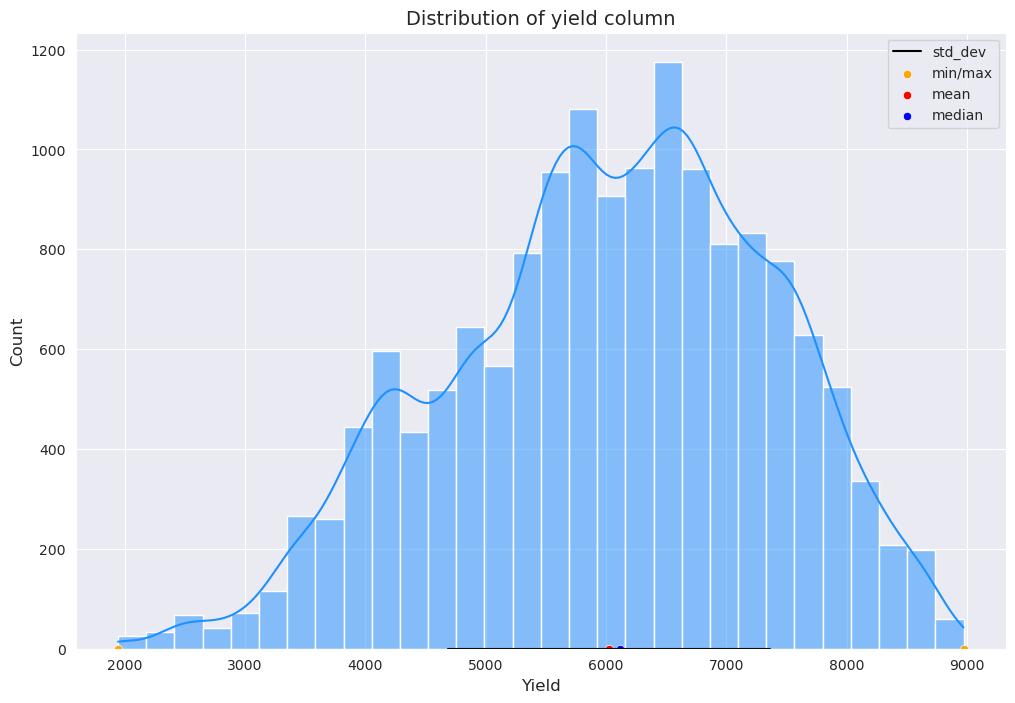

Statistics,Value
Minimum Value,1945.53
Maximum Value,8969.4
Range,7023.87
Mean,6025.19
Median,6117.48
Standard Deviation,1337.06
Skewness,-0.291195
Kurtosis,-0.436564


In [241]:
# Plot distribution of Duration Column
plot_dist(df_wb_copy, 'yield', 'Yield', 'Count', 'Distribution of yield column')

<p>Nice. We have a normal distribution in target variable.</p>

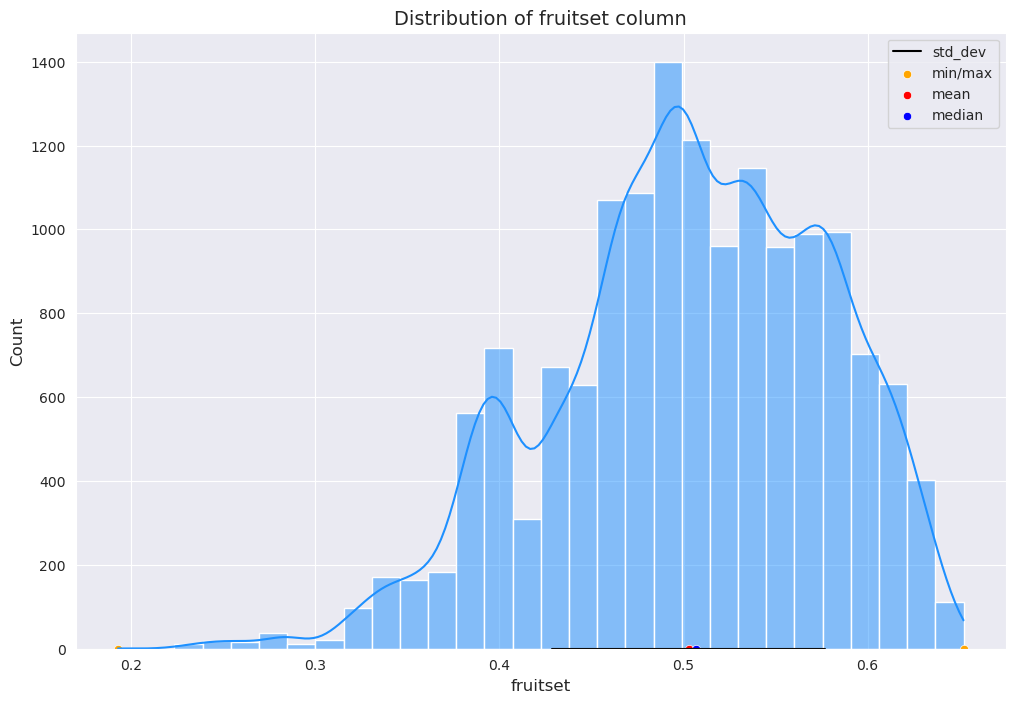

Statistics,Value
Minimum Value,0.192732
Maximum Value,0.652144
Range,0.459412
Mean,0.502741
Median,0.5066
Standard Deviation,0.0743896
Skewness,-0.426606
Kurtosis,-0.169732


In [242]:
# Let's see the distribution of fruitset variable
plot_dist(df_wb_copy, 'fruitset', 'fruitset', 'Count', 'Distribution of fruitset column')

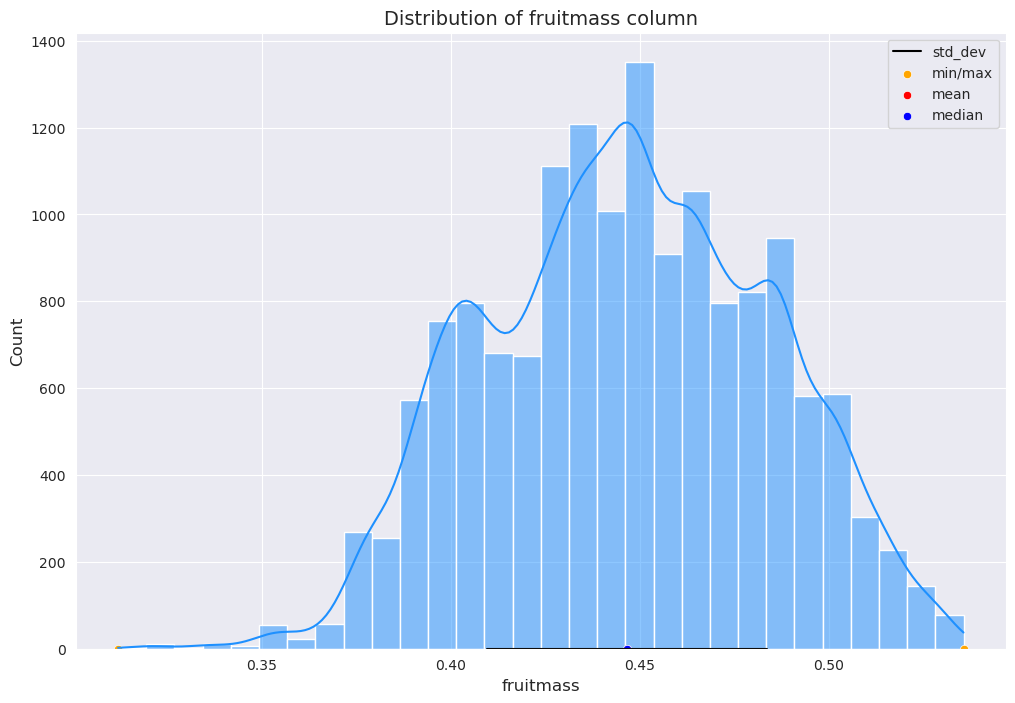

Statistics,Value
Minimum Value,0.311921
Maximum Value,0.53566
Range,0.22374
Mean,0.446553
Median,0.44657
Standard Deviation,0.0370353
Skewness,-0.0555314
Kurtosis,-0.562269


In [243]:
# Let's see the distribution of fruitmass variable
plot_dist(df_wb_copy, 'fruitmass', 'fruitmass', 'Count', 'Distribution of fruitmass column')

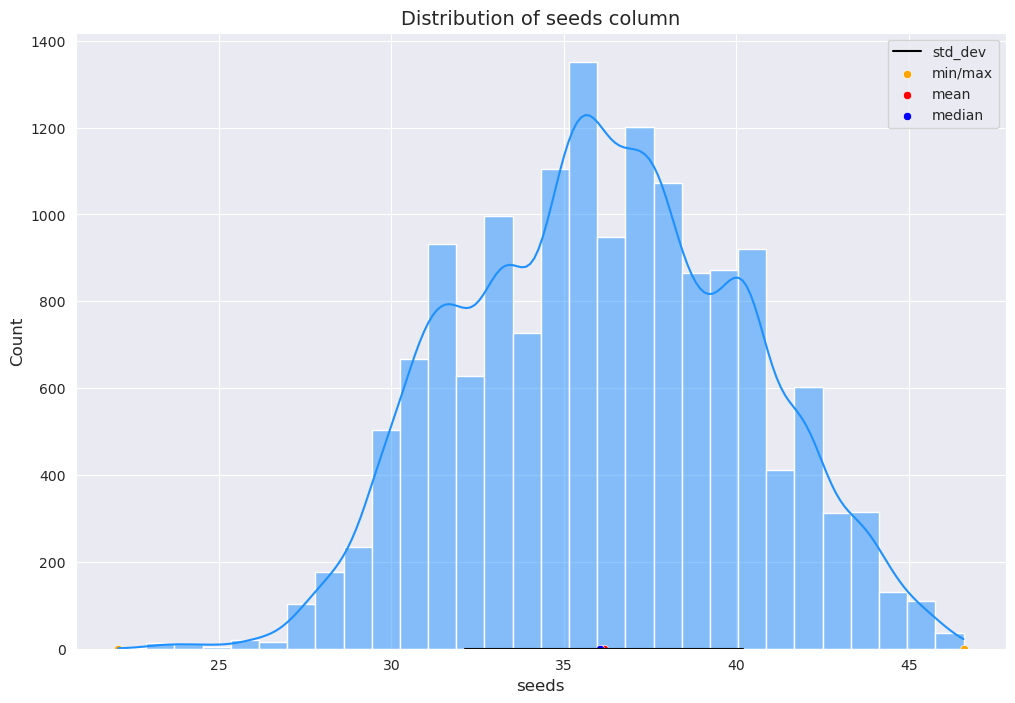

Statistics,Value
Minimum Value,22.0792
Maximum Value,46.5851
Range,24.5059
Mean,36.165
Median,36.0407
Standard Deviation,4.03109
Skewness,0.0153871
Kurtosis,-0.518231


In [244]:
# Let's see the distribution of seeds variable
plot_dist(df_wb_copy, 'seeds', 'seeds', 'Count', 'Distribution of seeds column')

<p>Varibles 
<ul>
    <li>clonesize</li>
    <li>honeybee</li>
    <li>bumbles</li>
    <li>andrena</li>
    <li>osmia</li>
    <li>MaxOfUpperTRange</li>
    <li>MinOfUpperTRange</li>
    <li>AverageOfUpperTRange</li>
    <li>MaxOfLowerTRange</li>
    <li>MinOfLowerTRange</li>
    <li>AverageOfLowerTRange</li>
    <li>RainingDays</li>
    <li>AverageRainingDays</li>
</ul>
has too few unique values</p>
<p>Let's check there distribution as category variables</p>

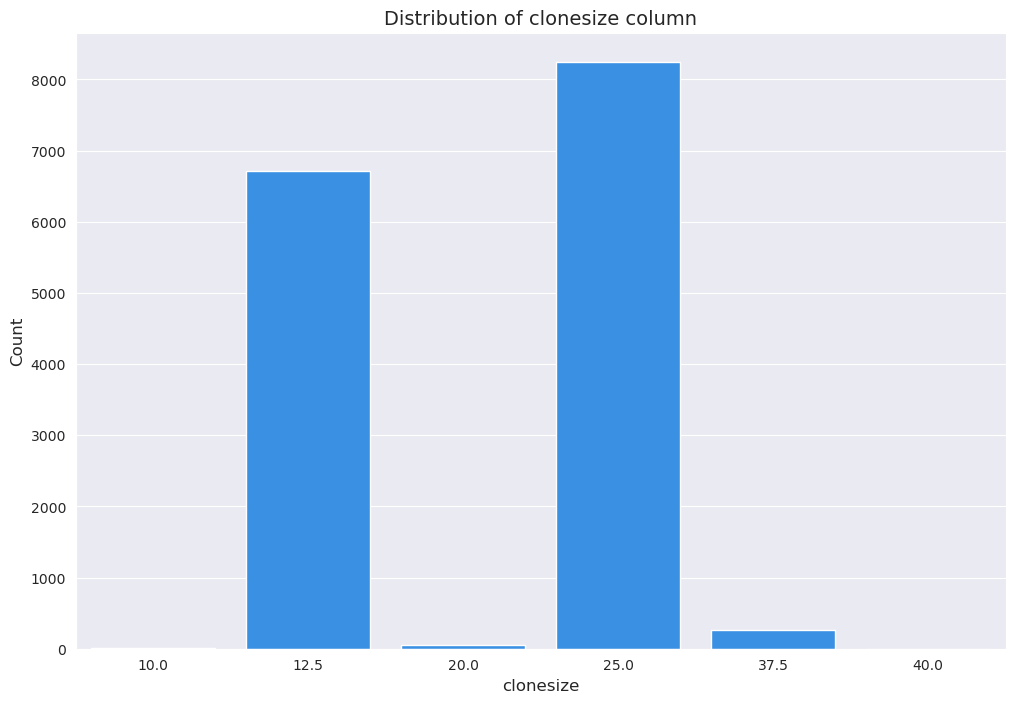

In [245]:
# Plotting distribution of clonesize column
plot_cat(df_wb_copy, 'clonesize', 'clonesize', 'Count', 'Distribution of clonesize column')

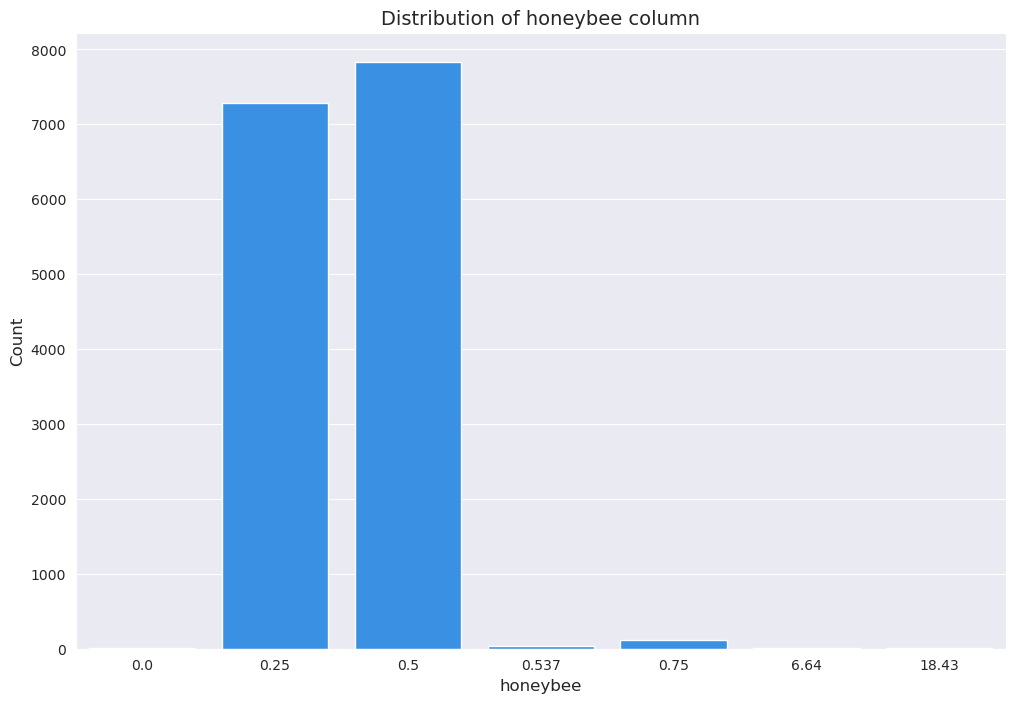

In [246]:
# Plotting distribution of honeybee column
plot_cat(df_wb_copy, 'honeybee', 'honeybee', 'Count', 'Distribution of honeybee column')

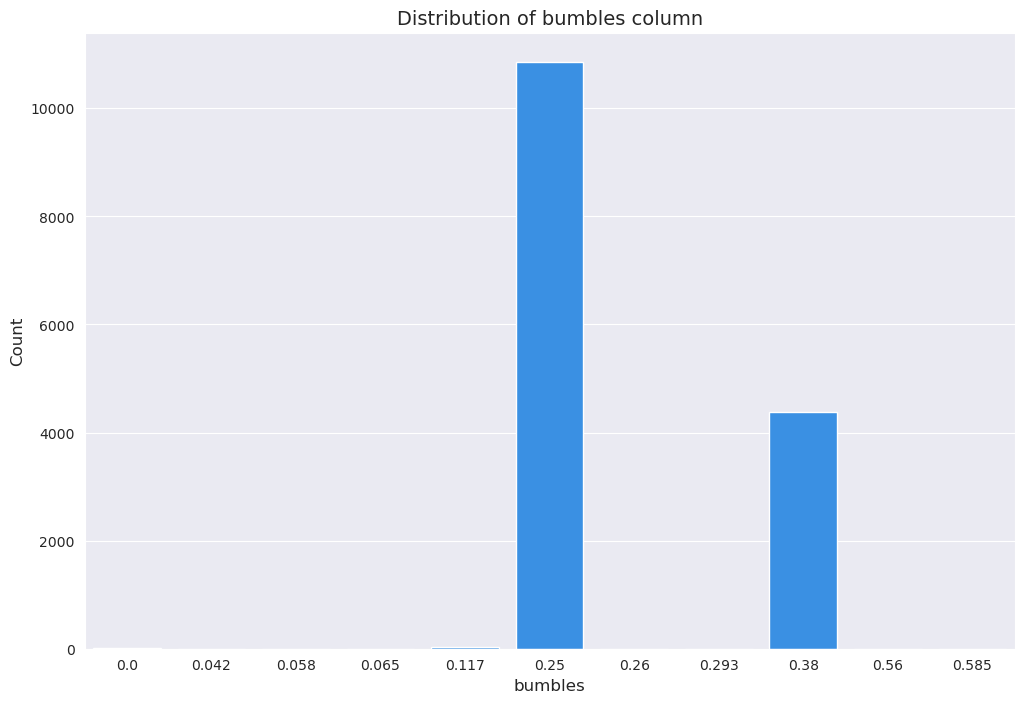

In [247]:
# Plotting distribution of bumbles column
plot_cat(df_wb_copy, 'bumbles', 'bumbles', 'Count', 'Distribution of bumbles column')

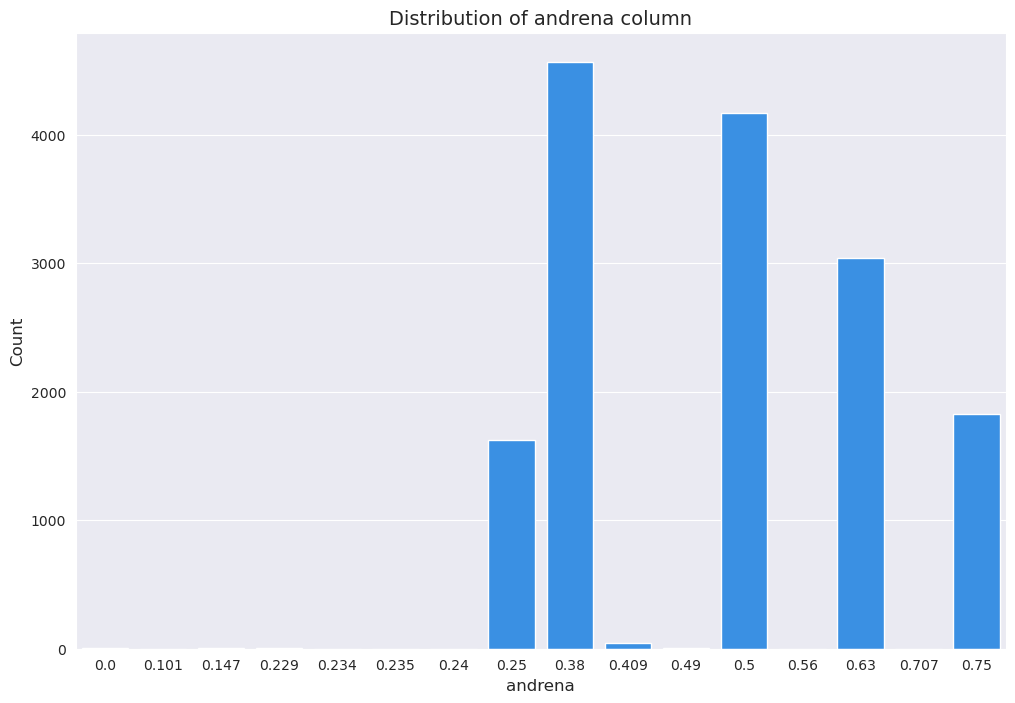

In [248]:
# Plotting distribution of andrena column
plot_cat(df_wb_copy, 'andrena', 'andrena', 'Count', 'Distribution of andrena column')

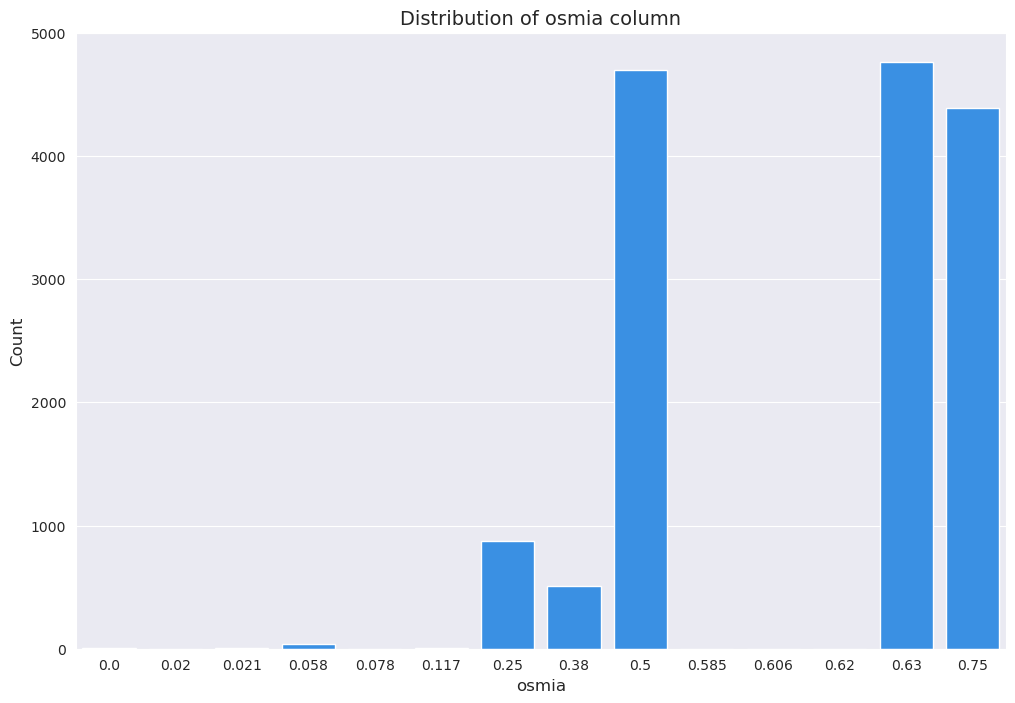

In [249]:
# Plotting distribution of osmia column
plot_cat(df_wb_copy, 'osmia', 'osmia', 'Count', 'Distribution of osmia column')

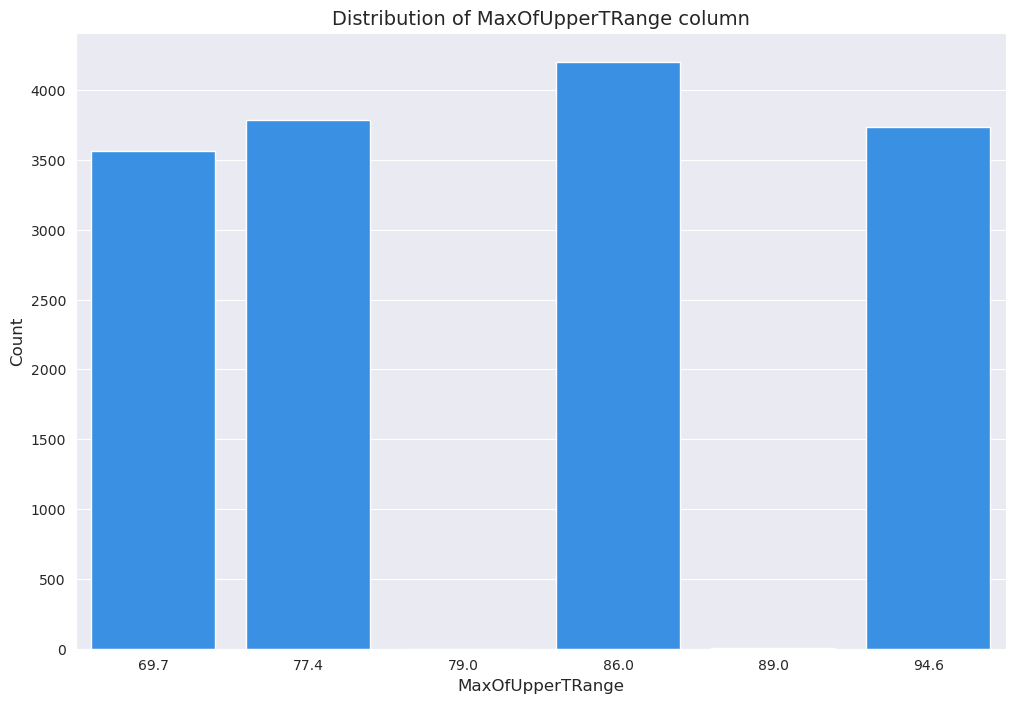

In [250]:
# Plotting distribution of MaxOfUpperTRange column
plot_cat(df_wb_copy, 'MaxOfUpperTRange', 'MaxOfUpperTRange', 'Count', 'Distribution of MaxOfUpperTRange column')

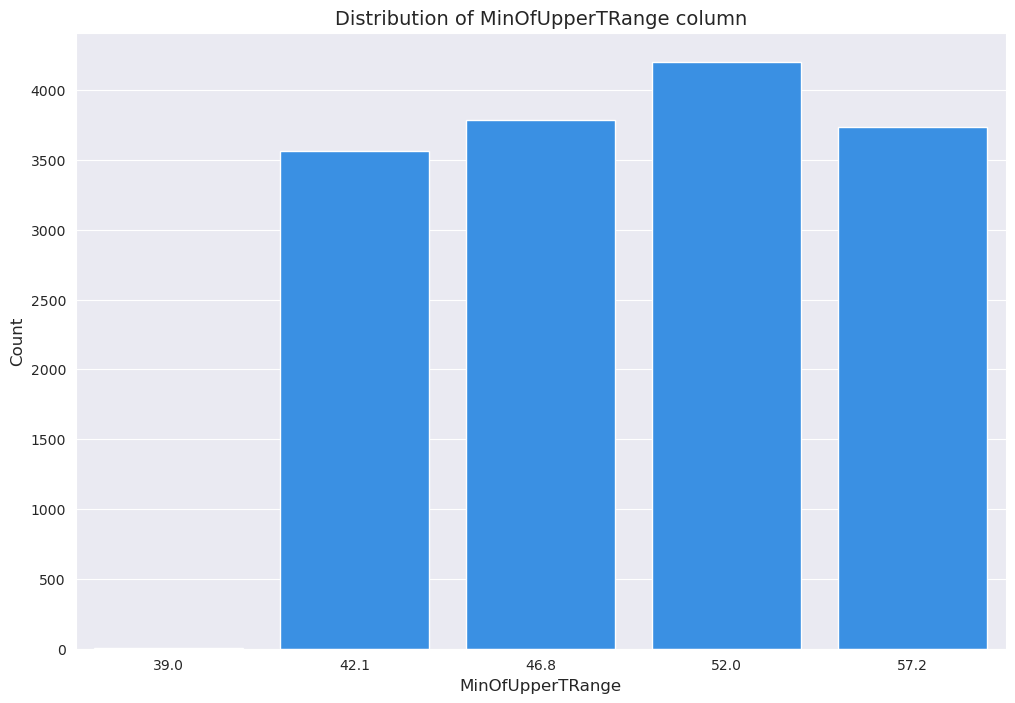

In [251]:
# Plotting distribution of MinOfUpperTRange column
plot_cat(df_wb_copy, 'MinOfUpperTRange', 'MinOfUpperTRange', 'Count', 'Distribution of MinOfUpperTRange column')

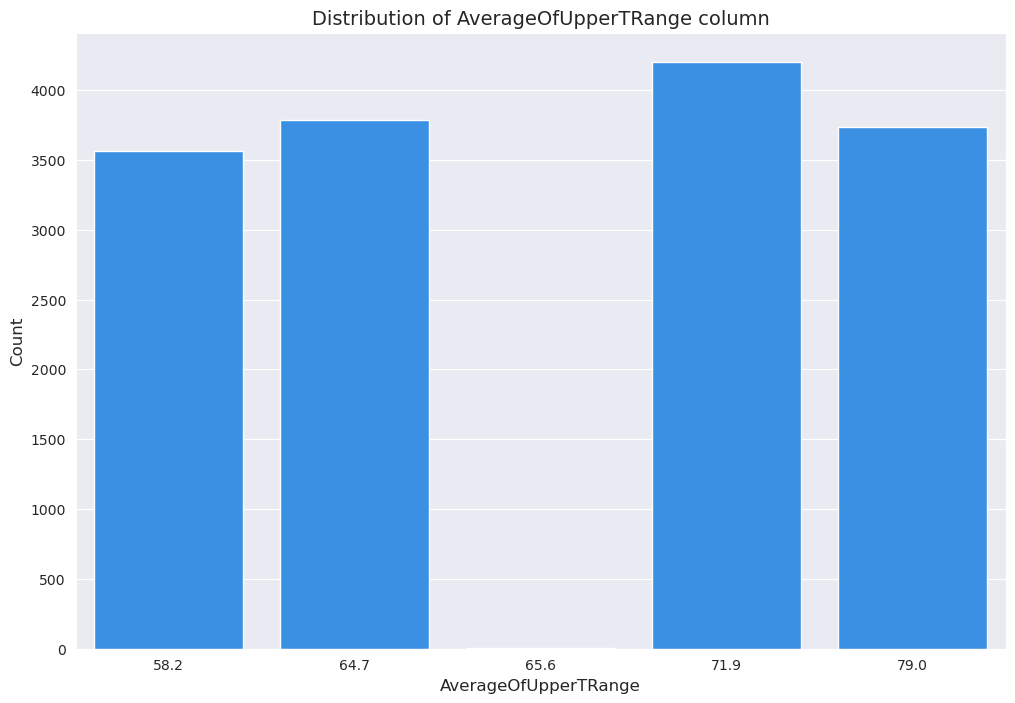

In [252]:
# Plotting distribution of AverageOfUpperTRange column
plot_cat(df_wb_copy, 'AverageOfUpperTRange', 'AverageOfUpperTRange', 'Count', 'Distribution of AverageOfUpperTRange column')

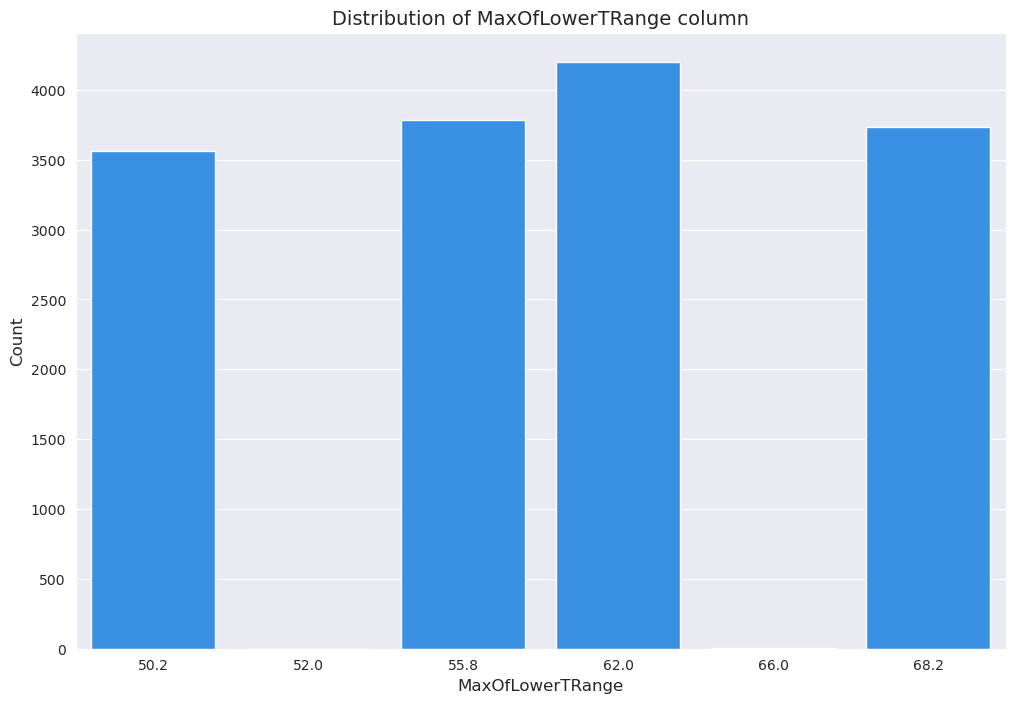

In [253]:
# Plotting distribution of MaxOfLowerTRange column
plot_cat(df_wb_copy, 'MaxOfLowerTRange', 'MaxOfLowerTRange', 'Count', 'Distribution of MaxOfLowerTRange column')

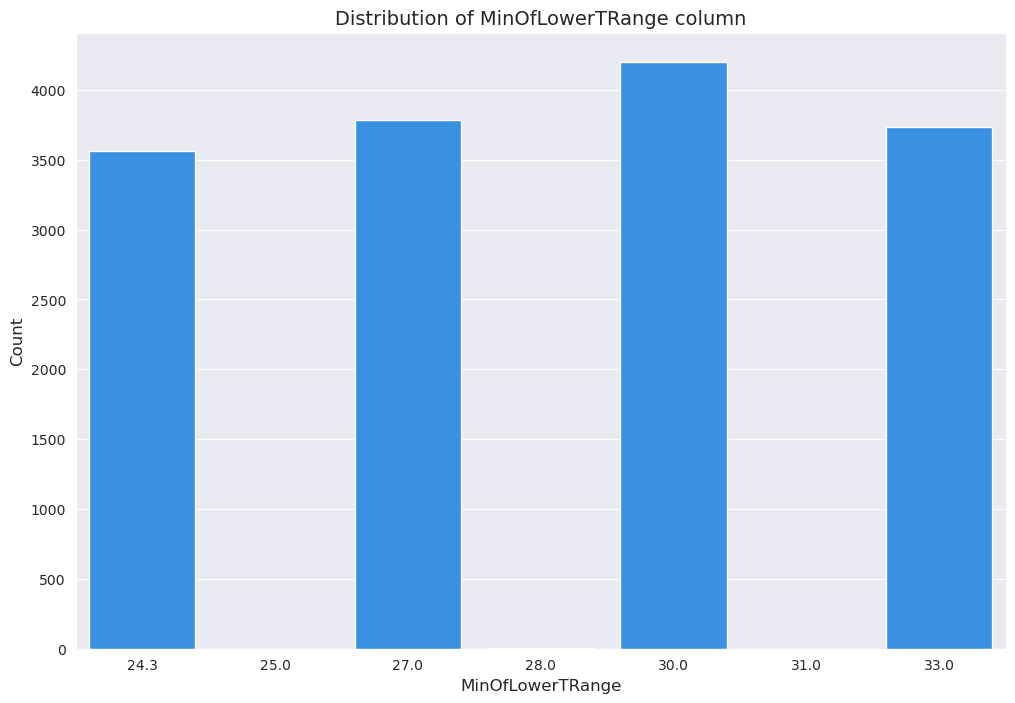

In [254]:
# Plotting distribution of MinOfLowerTRange column
plot_cat(df_wb_copy, 'MinOfLowerTRange', 'MinOfLowerTRange', 'Count', 'Distribution of MinOfLowerTRange column')

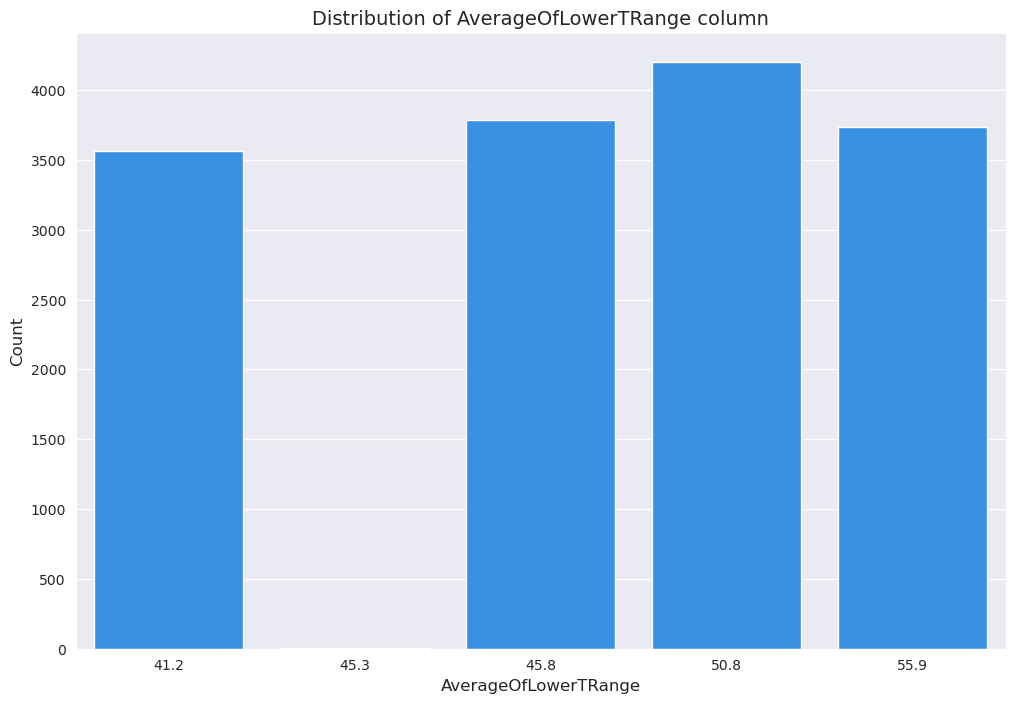

In [255]:
# Plotting distribution of AverageOfLowerTRange column
plot_cat(df_wb_copy, 'AverageOfLowerTRange', 'AverageOfLowerTRange', 'Count', 'Distribution of AverageOfLowerTRange column')

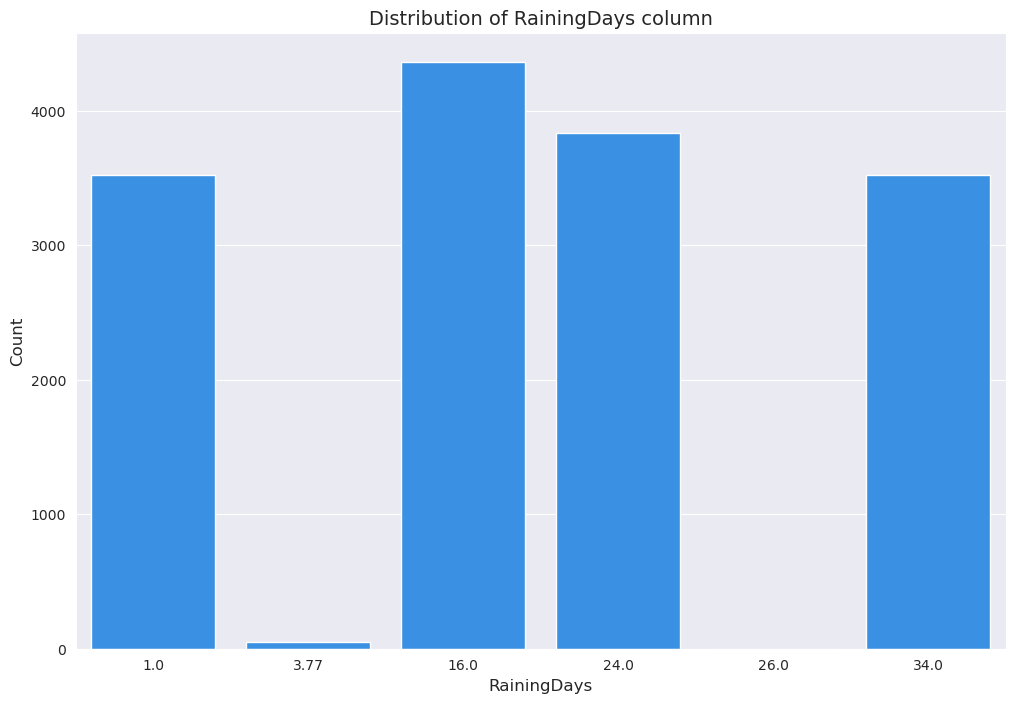

In [256]:
# Plotting distribution of RainingDays column
plot_cat(df_wb_copy, 'RainingDays', 'RainingDays', 'Count', 'Distribution of RainingDays column')

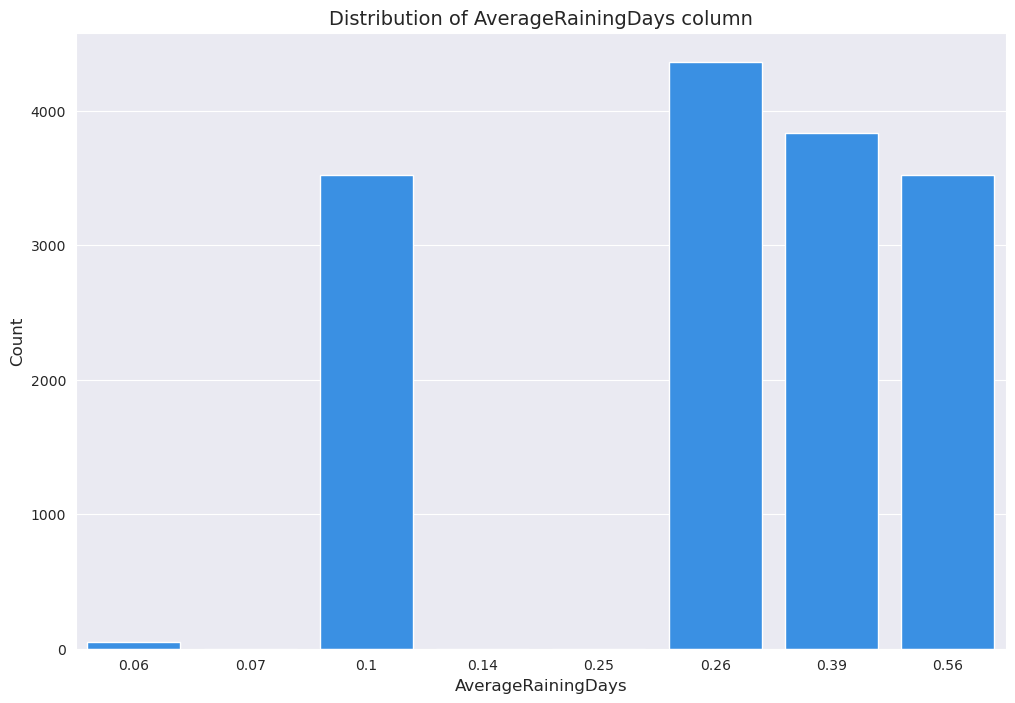

In [257]:
# Plotting distribution of AverageRainingDays column
plot_cat(df_wb_copy, 'AverageRainingDays', 'AverageRainingDays', 'Count', 'Distribution of AverageRainingDays column')

<div class="col-md-8">
    <h4 id="sub_section1_2">ii. Bivariate analysis</h4>
    <p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [258]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

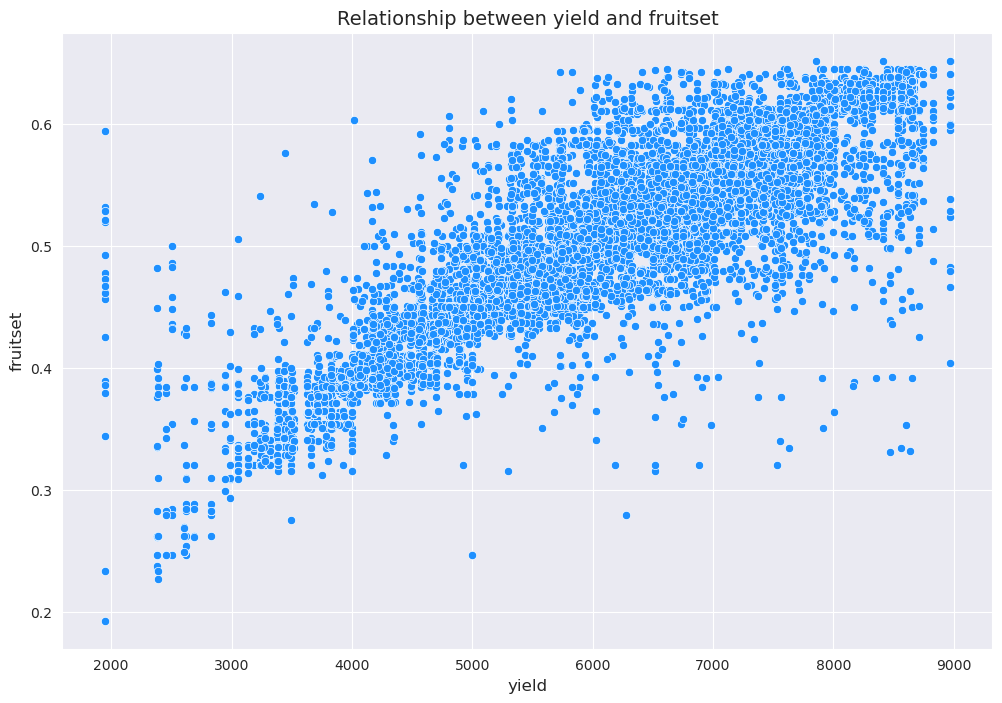

In [259]:
# Relationship between yield and fruitset
plot_num_vs_target(df_wb_copy, 'fruitset', 'yield', 'yield', 'fruitset', 'Relationship between yield and fruitset')

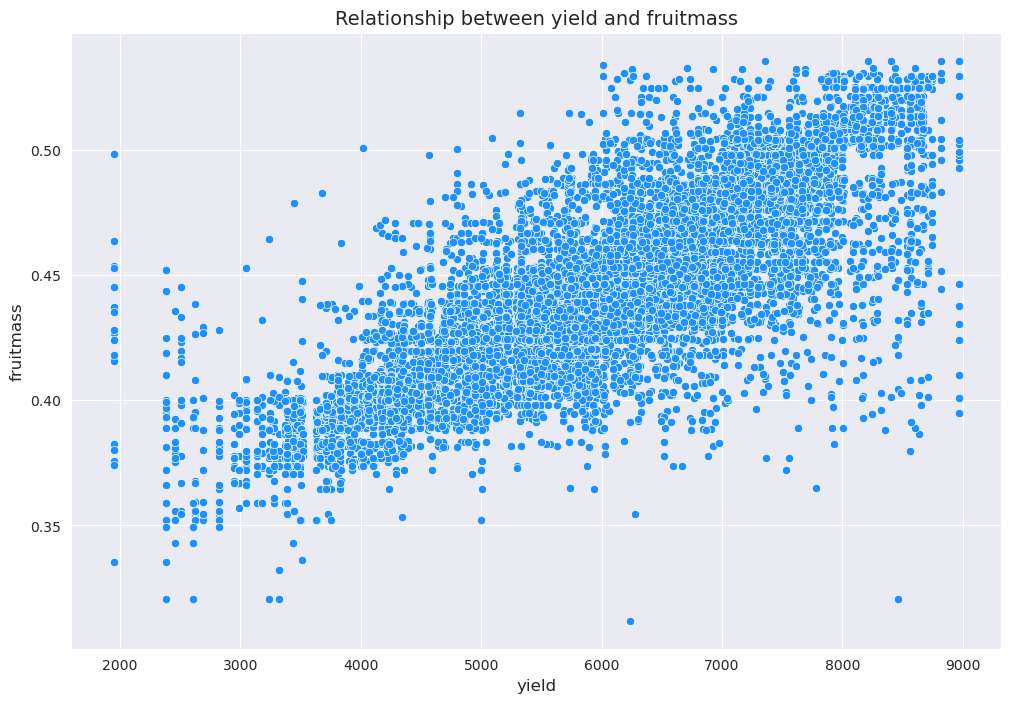

In [260]:
# Relationship between yield and fruitmass
plot_num_vs_target(df_wb_copy, 'fruitmass', 'yield', 'yield', 'fruitmass', 'Relationship between yield and fruitmass')

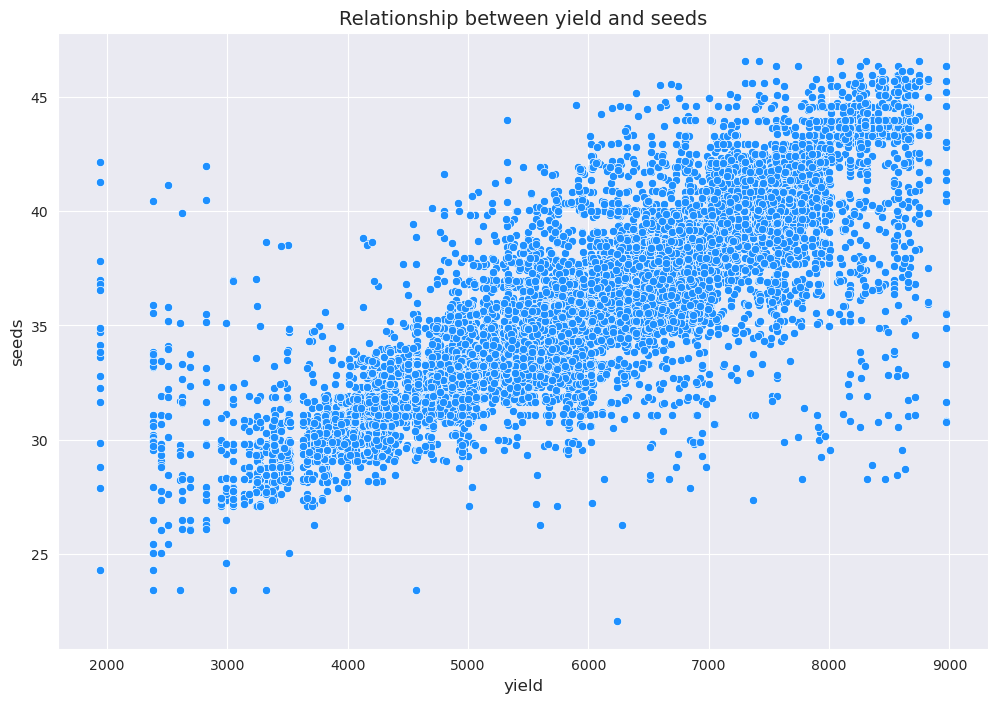

In [261]:
# Relationship between yield and fruitmass
plot_num_vs_target(df_wb_copy, 'seeds', 'yield', 'yield', 'seeds', 'Relationship between yield and seeds')

In [262]:
# Function for plotting the distribution of categorical variables against the target variable
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=col, y=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

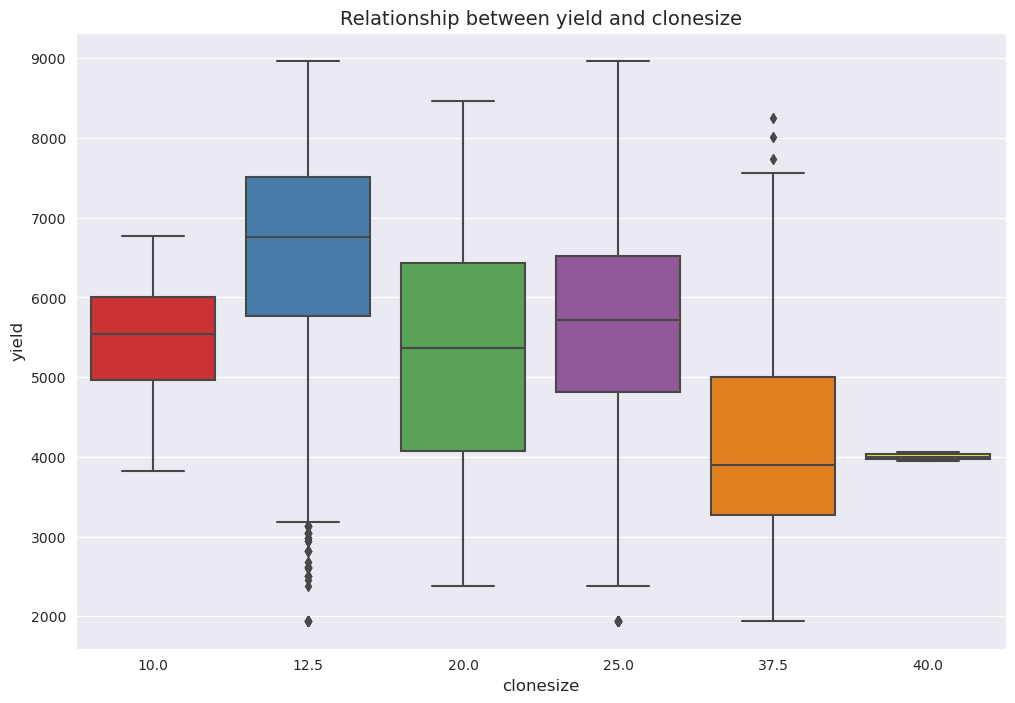

In [263]:
# Relationship between yield and clonesize
plot_cat_vs_target(df_wb_copy, 'clonesize', 'yield', 'clonesize', 'yield', 'Relationship between yield and clonesize')

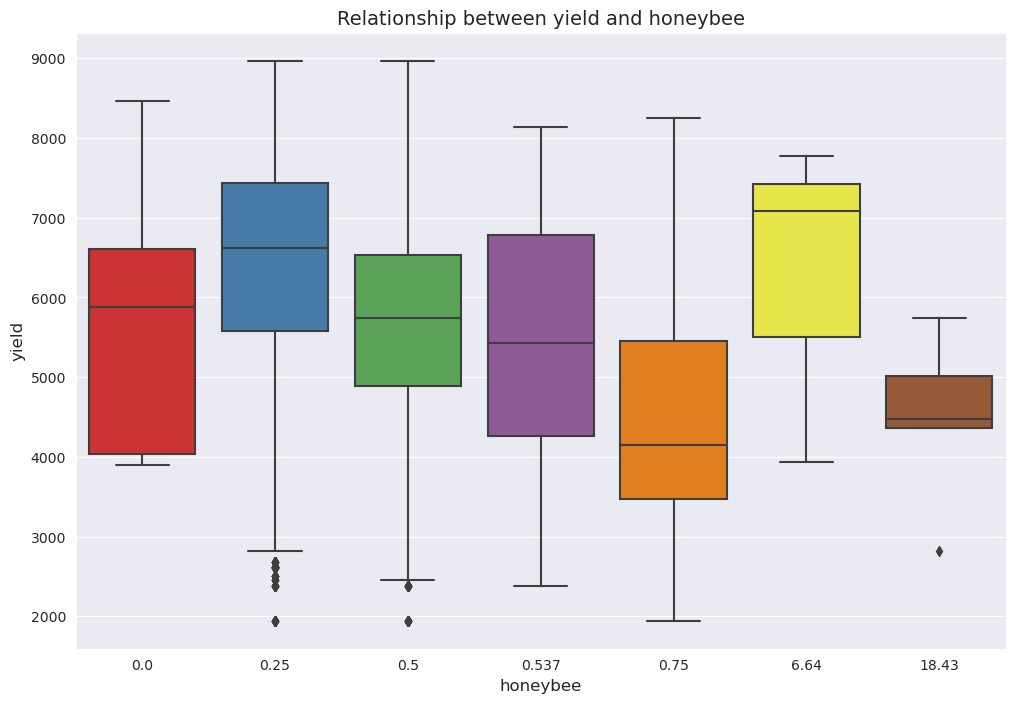

In [264]:
# Relationship between yield and honeybee
plot_cat_vs_target(df_wb_copy, 'honeybee', 'yield', 'honeybee', 'yield', 'Relationship between yield and honeybee')

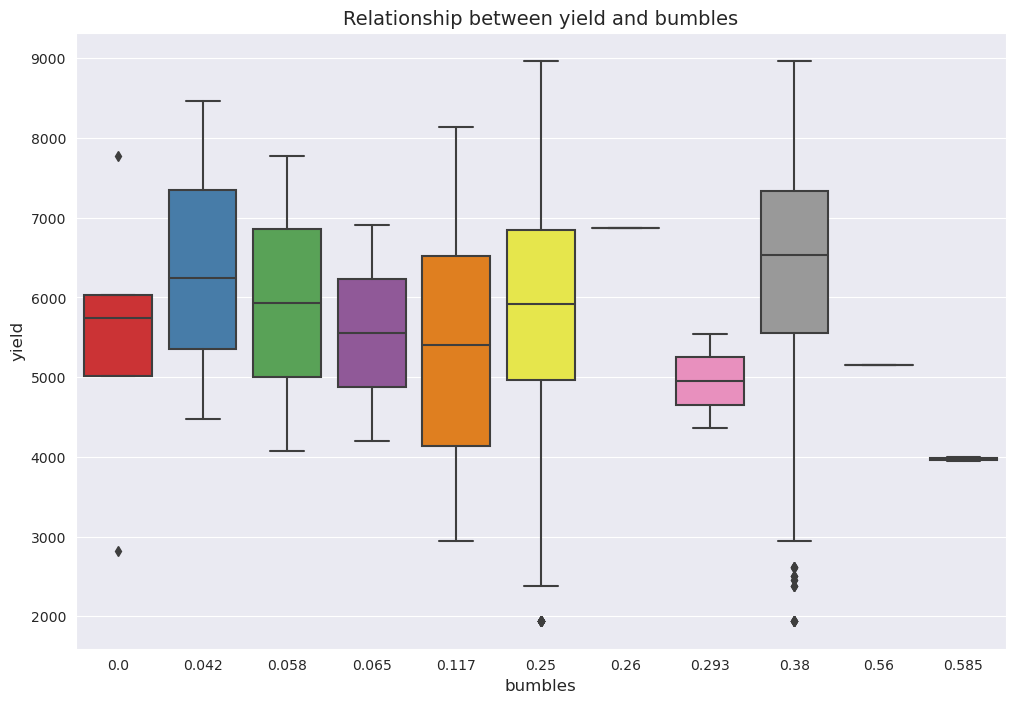

In [265]:
# Relationship between yield and bumbles
plot_cat_vs_target(df_wb_copy, 'bumbles', 'yield', 'bumbles', 'yield', 'Relationship between yield and bumbles')

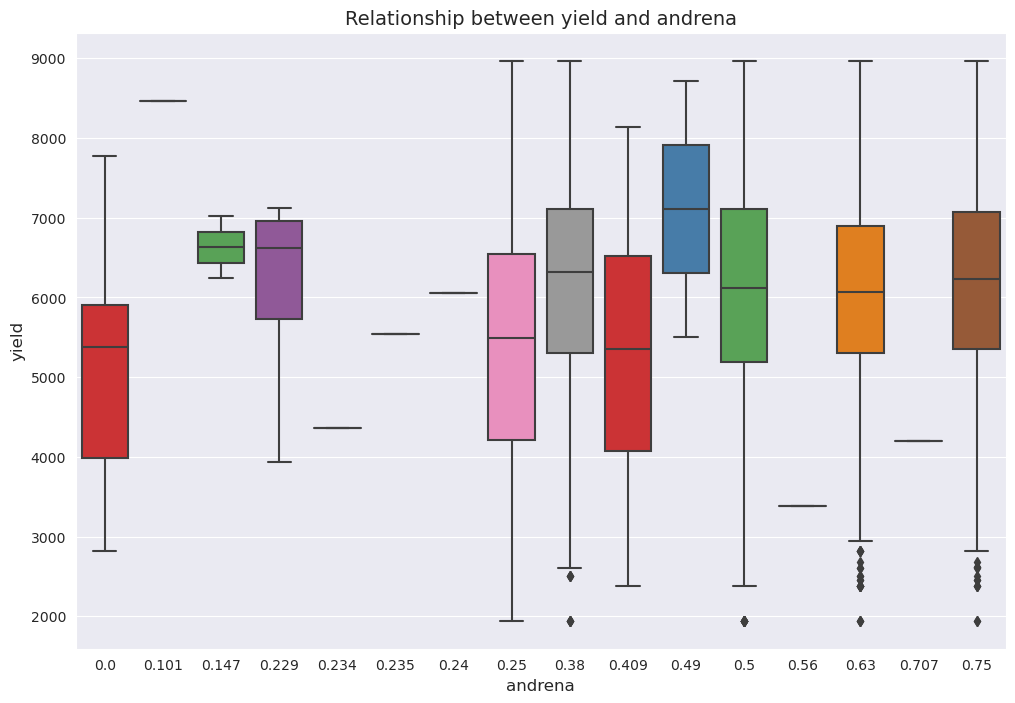

In [266]:
# Relationship between yield and andrena
plot_cat_vs_target(df_wb_copy, 'andrena', 'yield', 'andrena', 'yield', 'Relationship between yield and andrena')

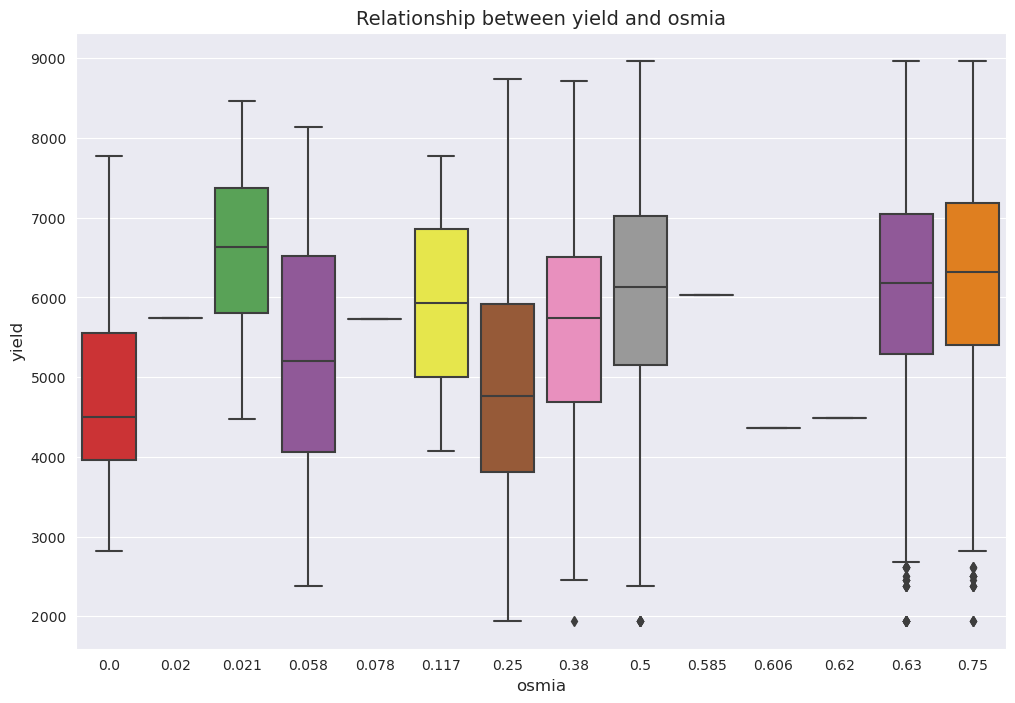

In [267]:
# Relationship between yield and osmia
plot_cat_vs_target(df_wb_copy, 'osmia', 'yield', 'osmia', 'yield', 'Relationship between yield and osmia')

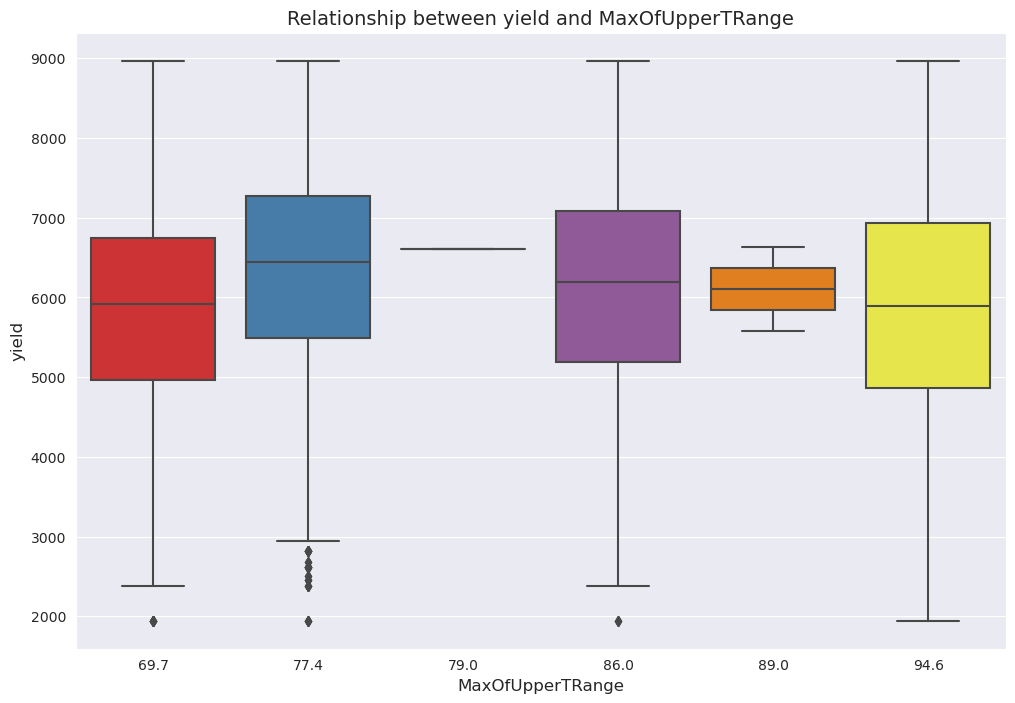

In [268]:
# Relationship between yield and MaxOfUpperTRange
plot_cat_vs_target(df_wb_copy, 'MaxOfUpperTRange', 'yield', 'MaxOfUpperTRange', 'yield', 'Relationship between yield and MaxOfUpperTRange')

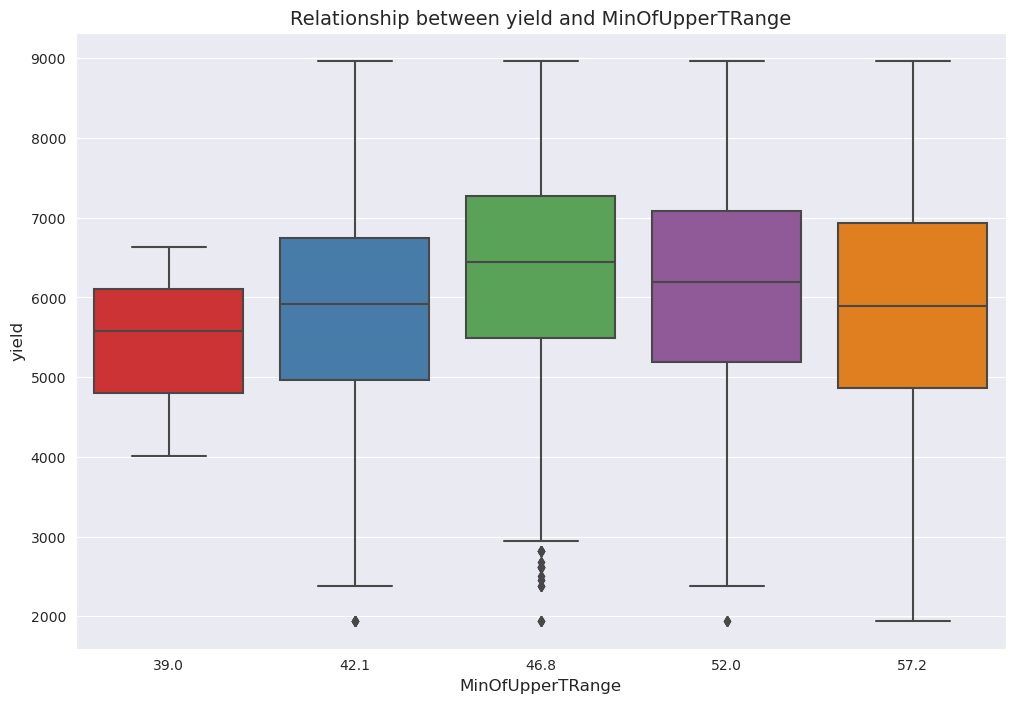

In [269]:
# Relationship between yield and MinOfUpperTRange
plot_cat_vs_target(df_wb_copy, 'MinOfUpperTRange', 'yield', 'MinOfUpperTRange', 'yield', 'Relationship between yield and MinOfUpperTRange')

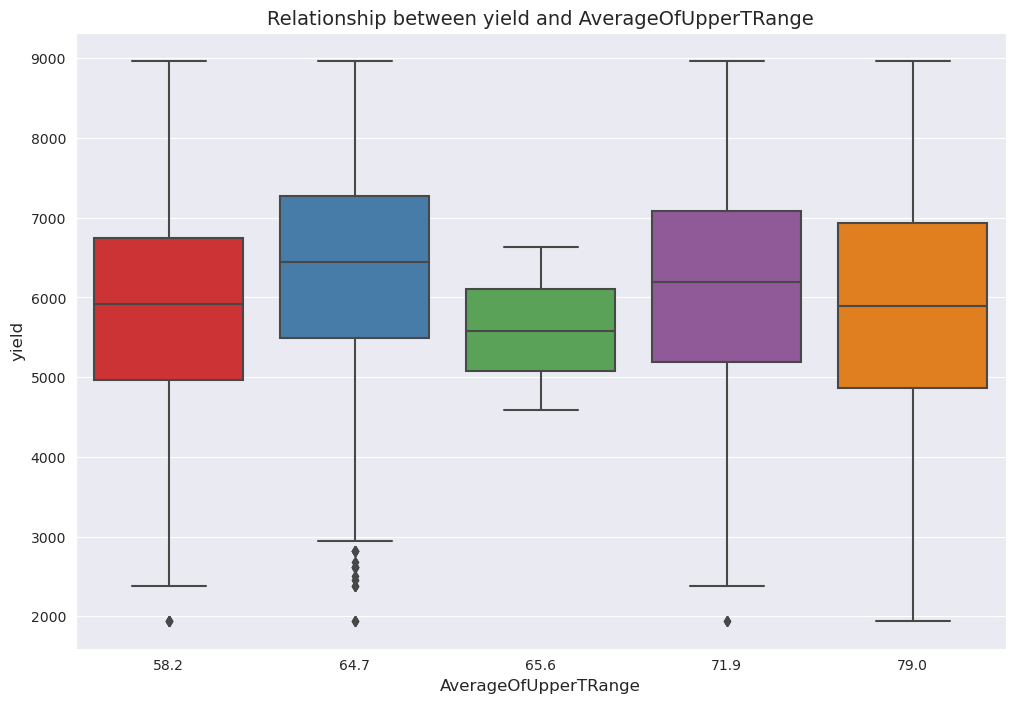

In [270]:
# Relationship between yield and AverageOfUpperTRange
plot_cat_vs_target(df_wb_copy, 'AverageOfUpperTRange', 'yield', 'AverageOfUpperTRange', 'yield', 'Relationship between yield and AverageOfUpperTRange')

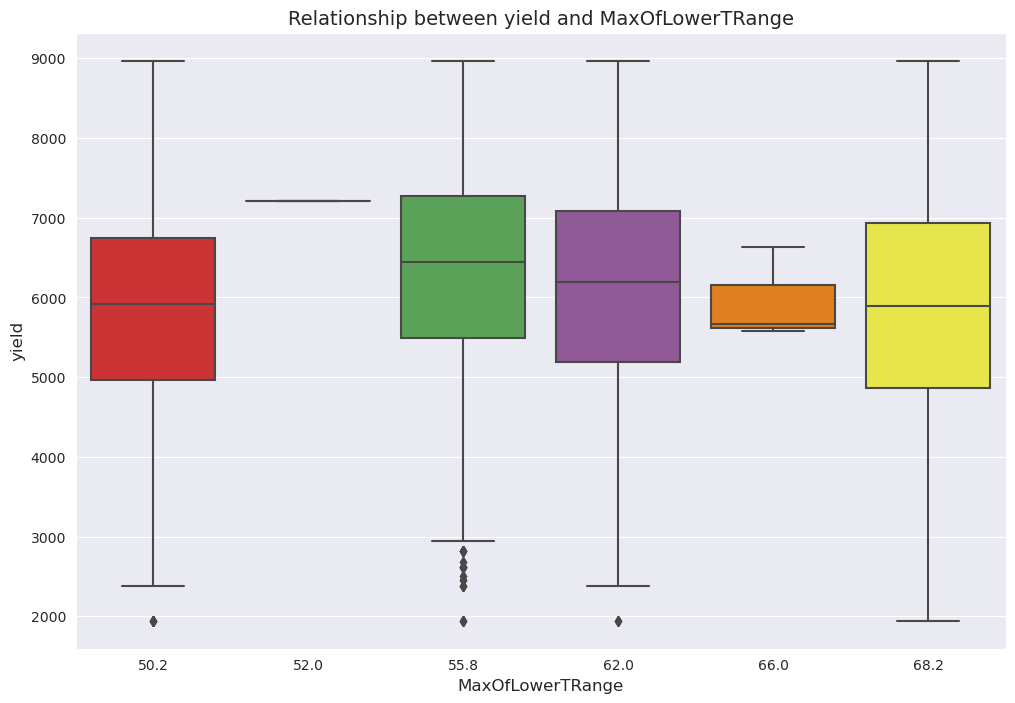

In [271]:
# Relationship between yield and MaxOfLowerTRange
plot_cat_vs_target(df_wb_copy, 'MaxOfLowerTRange', 'yield', 'MaxOfLowerTRange', 'yield', 'Relationship between yield and MaxOfLowerTRange')

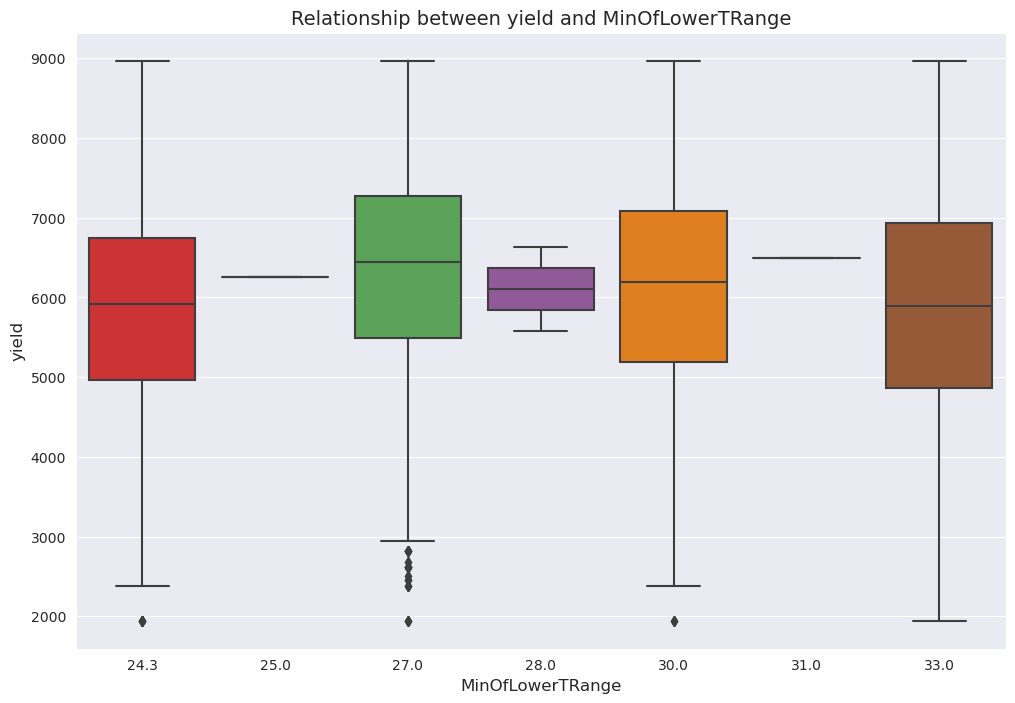

In [272]:
# Relationship between yield and MinOfLowerTRange
plot_cat_vs_target(df_wb_copy, 'MinOfLowerTRange', 'yield', 'MinOfLowerTRange', 'yield', 'Relationship between yield and MinOfLowerTRange')

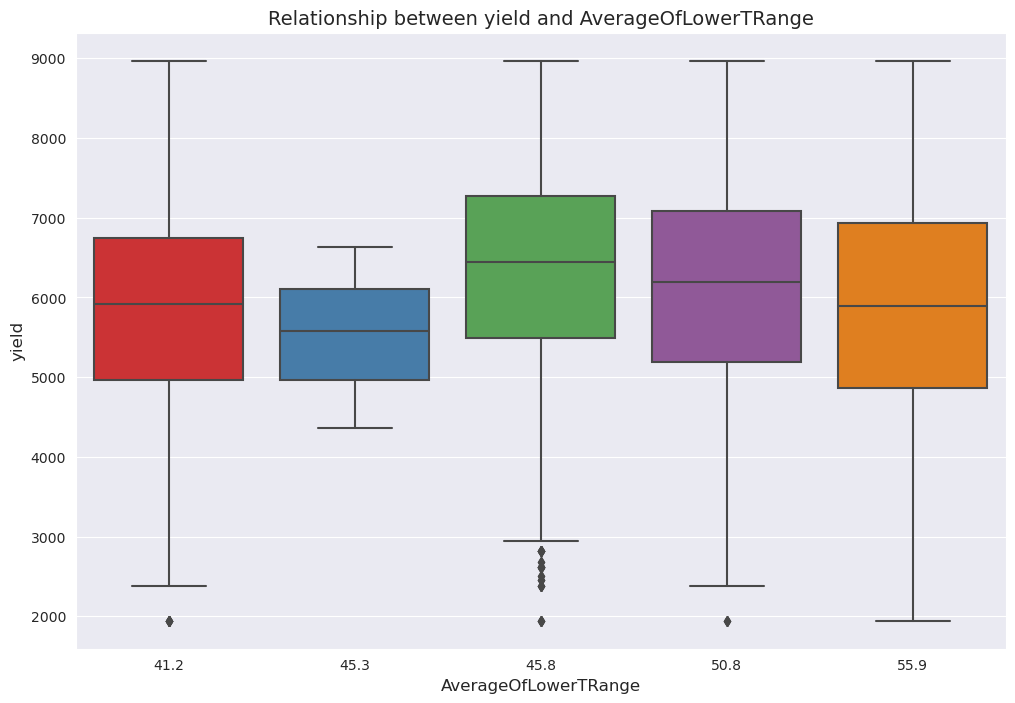

In [273]:
# Relationship between yield and AverageOfLowerTRange
plot_cat_vs_target(df_wb_copy, 'AverageOfLowerTRange', 'yield', 'AverageOfLowerTRange', 'yield', 'Relationship between yield and AverageOfLowerTRange')

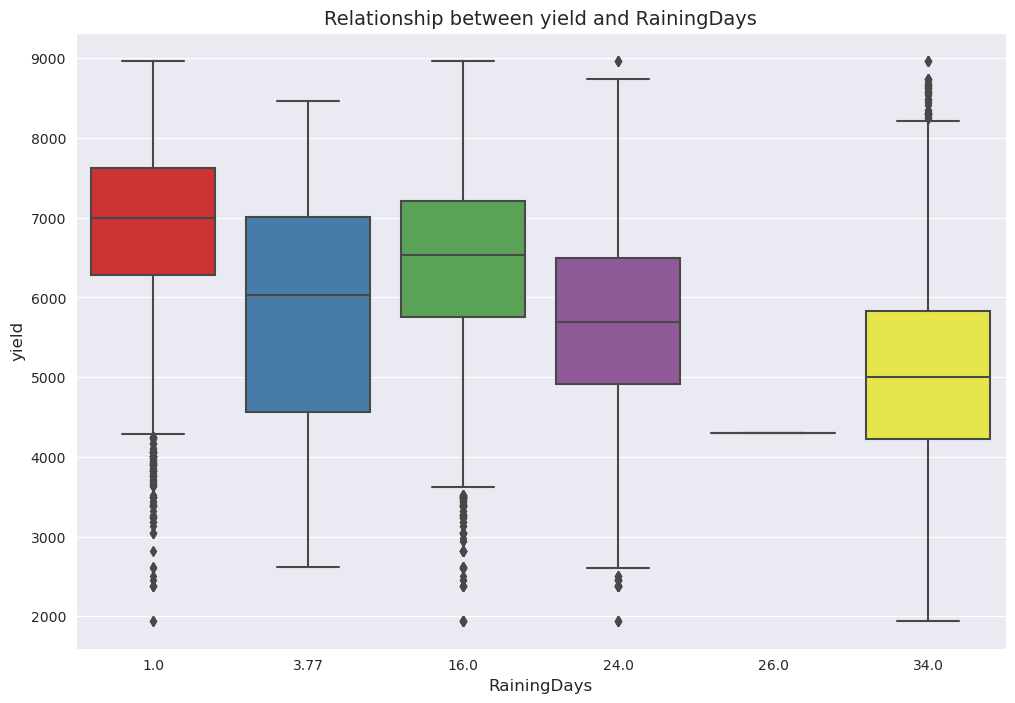

In [274]:
# Relationship between yield and RainingDays
plot_cat_vs_target(df_wb_copy, 'RainingDays', 'yield', 'RainingDays', 'yield', 'Relationship between yield and RainingDays')

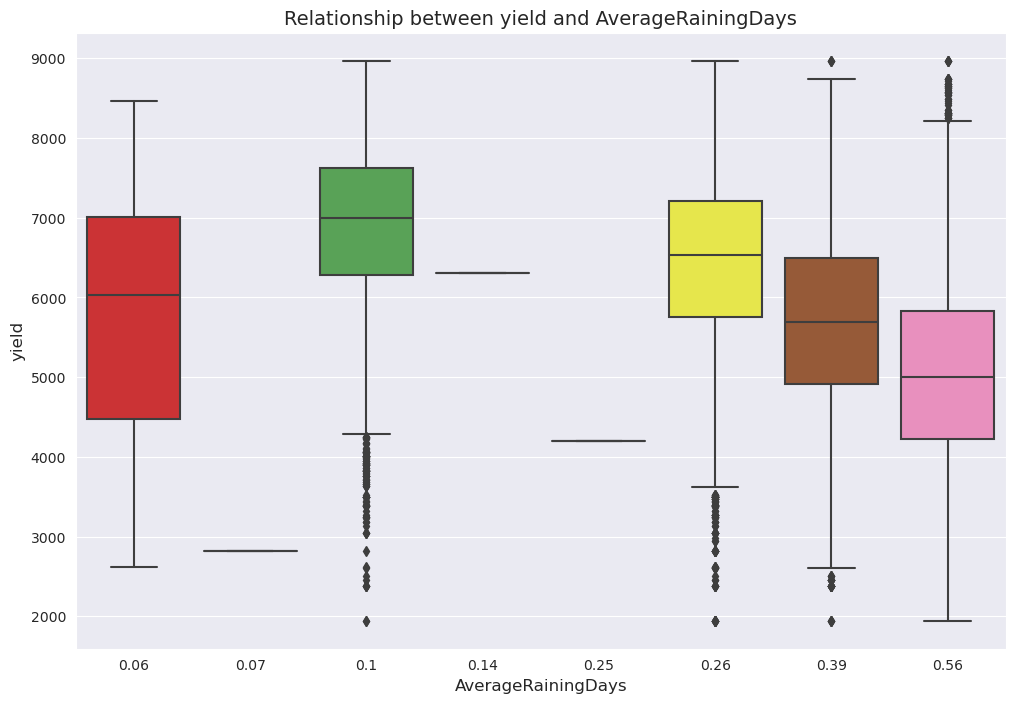

In [275]:
# Relationship between yield and AverageRainingDays
plot_cat_vs_target(df_wb_copy, 'AverageRainingDays', 'yield', 'AverageRainingDays', 'yield', 'Relationship between yield and AverageRainingDays')

<div class="col-md-8">
    <h3 id="section5">5. Data Preprocessing</h3>
    <p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
    <ul>
        <li>One-hot encode categorical variables</li>
        <li>Lable encode categorical variables</li>
    </ul>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [276]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

<p>Now that we have only the continuos(float) variables, there is not need of encoding. let's check the correlation between them:</p>

In [277]:
# Function to plot correlation between variables
def plot_corr(df, size=10):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

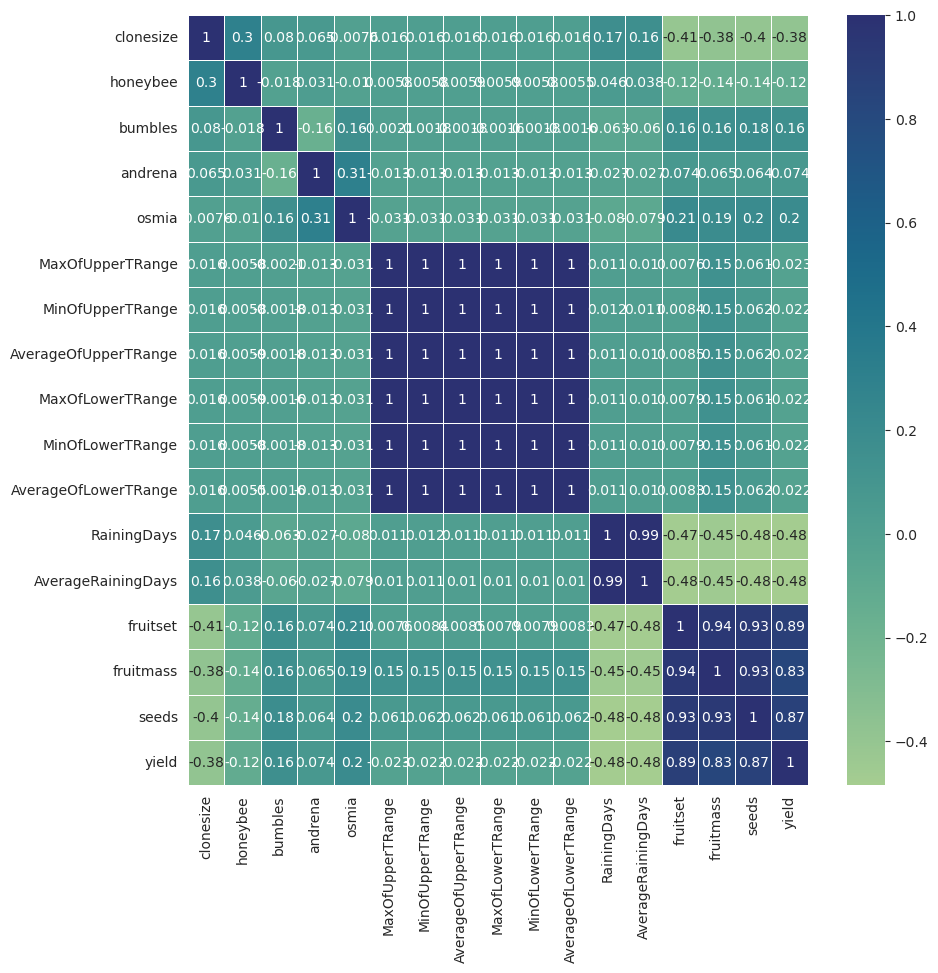

In [278]:
# Correlation between variables in the training set
plot_corr(df_wb_copy.drop(['id'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [279]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

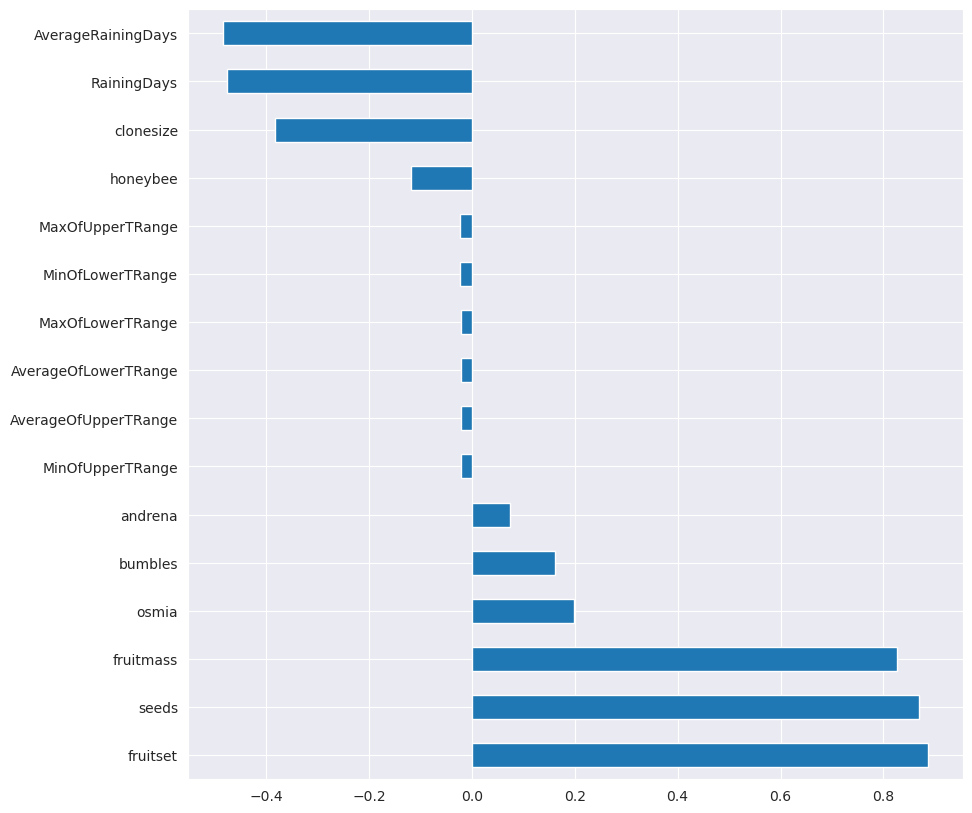

In [280]:
# Check correlation of variables with the target variable
plot_corr_target(df_wb_copy.drop(['id'], axis=1), 'yield')

<div class="col-md-8">
    <h3 id="section6">6. Model Building</h3>
    <p>Let's build a model to predict the Survival of passengers on the Titanic:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [281]:
# We will first separate the target variable from the features
y = df_wb_copy['yield']
x = df_wb_copy.drop(['yield', 'id'], axis=1)
x.shape, y.shape

((15289, 16), (15289,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [283]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
# x_scaled = x

df_wb_test_scaled = scaler.fit_transform(df_wb_test_copy.drop(['id'], axis=1))
# df_wb_test_scaled = df_wb_test_copy.drop(['id'], axis=1)

In [284]:
x = pd.DataFrame(x_scaled, columns = x.columns)

df_wb_test_final = pd.DataFrame(df_wb_test_scaled, columns = df_wb_test_copy.drop(['id'], axis=1).columns)

In [285]:
# Check train data after scaling
x.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.5,0.027,0.43,1,0.67,0,0.17,0,0,0,0,0.7,0.66,0.51,0.47,0.42
1,0.5,0.027,0.43,0.67,0.67,0,0.17,0,0,0,0,0.7,0.66,0.55,0.49,0.48
2,0.083,0.014,0.43,0.84,0.84,0.65,0.71,0.66,0.66,0.66,0.65,0.7,0.66,0.78,0.71,0.66
3,0.083,0.014,0.43,0.84,0.67,0.31,0.43,0.31,0.31,0.31,0.31,0.7,0.66,0.81,0.74,0.71
4,0.5,0.027,0.43,0.84,0.84,0.31,0.43,0.31,0.31,0.31,0.31,0.7,0.66,0.84,0.81,0.75


In [286]:
# Check test data after scaling
df_wb_test_final.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.55,0.014,0.43,0.33,0.33,0.65,0.71,0.66,0.66,0.66,0.65,0.7,0.66,0.4,0.43,0.32
1,0.091,0.014,0.43,1,0.84,1,1,1,1,1,1,0,0.08,0.61,0.59,0.57
2,0.091,0.014,0.43,0.84,0.84,0.65,0.71,0.66,0.66,0.66,0.65,0.45,0.4,0.84,0.78,0.72
3,0.55,0.027,0.65,0.51,0.84,0.65,0.71,0.66,0.66,0.66,0.65,0.45,0.4,0.48,0.5,0.4
4,1,0.041,0.43,0.33,0.33,1,1,1,1,1,1,0.7,0.66,0.3,0.34,0.24


<p>Now, let's split the dataset into training and test sets:</p>

In [287]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50, stratify=y)


In [288]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((11466, 16), (11466,), (3823, 16), (3823,))

<div class="col-md-8">
    <h3 id="section7">7. Model Generation and Evaluation</h3>
    <p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
    <h4 id="sub_section2_1">i. Ridge Regression</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [289]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [290]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [291]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)

    
    #Return the result in pre-defined format
    msle_train = mean_absolute_error(train_y_pred, train_y)
    ret = [np.sqrt(msle_train)]
    
    msle_test = mean_absolute_error(test_y_pred, test_y)
    ret.extend([np.sqrt(msle_test)])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [292]:
#Initialize the dataframe for storing coefficients.
col = ['mae_train','mae_test','intercept'] + ['coef_Var_%d'%i for i in range(1,17)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [293]:
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i])

In [294]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mae_train,mae_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15,coef_Var_16
alpha_0,19,19,1.4e+03,-1.3e+02,-2.7e+02,2e+02,1.1e+02,20,1.5e+03,6.7e+02,-7.2e+03,4.4e+02,7.1e+03,-2.4e+03,1.3e+02,-3.8e+02,5.5e+03,-1.7e+03,3.4e+03
alpha_1e-08,19,19,1.4e+03,-1.3e+02,-2.7e+02,2e+02,1.1e+02,20,1.5e+03,6.7e+02,-7.2e+03,4.4e+02,7.1e+03,-2.4e+03,1.3e+02,-3.8e+02,5.5e+03,-1.7e+03,3.4e+03
alpha_0.0001,19,19,1.4e+03,-1.3e+02,-2.7e+02,2e+02,1.1e+02,20,1.5e+03,6.7e+02,-7.2e+03,4.4e+02,7e+03,-2.4e+03,1.3e+02,-3.8e+02,5.5e+03,-1.7e+03,3.4e+03
alpha_0.001,19,19,1.4e+03,-1.3e+02,-2.7e+02,2e+02,1.1e+02,20,1.5e+03,6.6e+02,-7e+03,4.4e+02,6.9e+03,-2.4e+03,1.3e+02,-3.8e+02,5.5e+03,-1.7e+03,3.4e+03
alpha_0.01,19,19,1.4e+03,-1.4e+02,-2.7e+02,2e+02,1.1e+02,21,1.5e+03,6.2e+02,-5.9e+03,4.4e+02,5.8e+03,-2.4e+03,1.3e+02,-3.8e+02,5.5e+03,-1.7e+03,3.4e+03
alpha_1,19,19,1.5e+03,-1.5e+02,-2e+02,2.1e+02,1.1e+02,27,4.4e+02,78,-5.6e+02,2.9e+02,1.5e+02,-4.7e+02,1.2e+02,-3.8e+02,5.3e+03,-1.6e+03,3.3e+03
alpha_5,19,19,1.6e+03,-1.8e+02,-56,2.2e+02,1.2e+02,41,1.1e+02,-15,-1.7e+02,1.1e+02,3.7,-1.5e+02,79,-3.5e+02,4.7e+03,-8.5e+02,3.1e+03
alpha_10,19,20,1.7e+03,-2.1e+02,-7.8,2.3e+02,1.2e+02,55,46,-25,-1.1e+02,52,-12,-97,41,-3.3e+02,4.2e+03,-2.7e+02,3e+03
alpha_20,20,20,1.9e+03,-2.4e+02,12,2.4e+02,1.2e+02,77,6.6,-29,-81,12,-24,-71,-13,-3e+02,3.6e+03,4e+02,2.7e+03
alpha_25,20,20,1.9e+03,-2.6e+02,14,2.4e+02,1.2e+02,85,-2.6,-30,-74,2.4,-27,-65,-33,-2.9e+02,3.4e+03,6.1e+02,2.7e+03


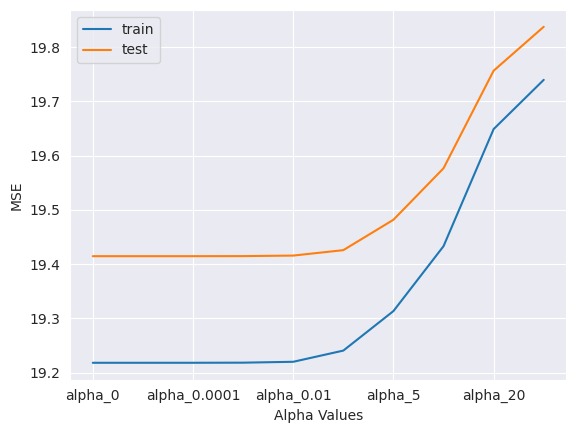

In [295]:
coef_matrix_ridge[['mae_train','mae_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [203]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

In [204]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
model = Ridge(alpha=0.01)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=Ridge(alpha=0.01), n_features_to_select=1)

In [205]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [206]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
9,MinOfLowerTRange,1
7,AverageOfUpperTRange,2
13,fruitset,3
10,AverageOfLowerTRange,4
5,MaxOfUpperTRange,5
15,seeds,6
14,fruitmass,7
6,MinOfUpperTRange,8
12,AverageRainingDays,9
8,MaxOfLowerTRange,10


In [207]:
cols = ranked['Feature_name'][:16].values
# cols = np.delete(cols, 5)
cols

array(['MinOfLowerTRange', 'AverageOfUpperTRange', 'fruitset',
       'AverageOfLowerTRange', 'MaxOfUpperTRange', 'seeds', 'fruitmass',
       'MinOfUpperTRange', 'AverageRainingDays', 'MaxOfLowerTRange',
       'clonesize', 'bumbles', 'andrena', 'osmia', 'RainingDays',
       'honeybee'], dtype=object)

In [208]:
#Fit the model
ridgereg = Ridge(alpha=0.01)
ridgereg.fit(train_x[cols],train_y)
train_y_pred = ridgereg.predict(train_x[cols])
test_y_pred = ridgereg.predict(test_x[cols])


#Return the result in pre-defined format
mae_train = mean_absolute_error(train_y_pred, train_y)
# rmsle_train = np.sqrt(msle_train)

mae_test = mean_absolute_error(test_y_pred, test_y)
# rmsle_test = np.sqrt(msle_test)

print('mae_train:   ', mae_train)
print('mae_test:   ', mae_test)

mae_train:    369.3410264413827
mae_test:    376.93339504836064


In [185]:
#Fit the model entire train data
# ridgereg = Ridge(alpha=1e-8,normalize=True)
ridgereg.fit(x[cols], y)
train_pred = ridgereg.predict(x[cols])
test_pred = ridgereg.predict(df_wb_test_final[cols])


#Return the result in pre-defined format
mae_train = mean_absolute_error(train_pred, y)
# rmsle_train = np.sqrt(msle_train)


print('rmse_train:   ', mae_train)

rmse_train:    371.0749831873523


In [186]:
df_sample.shape, test_pred.shape

((10194, 2), (10194,))

In [187]:
df_sample.head()

,id,yield
0,15289,3.8e+03
1,15290,5.8e+03
2,15291,7.1e+03
3,15292,4.6e+03
4,15293,3.1e+03


In [188]:
df_sample['yield'] = test_pred

In [189]:
df_sample.to_csv('submission_wild_blue_berry_ridge.csv', index=False)